In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import dp_algorithms

data = pd.read_csv('data/student-mat.csv', sep = ';')

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
# convert all the features into numerical ones
data['school']     = data['school'].apply(lambda x: 0 if x == "GP" else 1)
data['sex']        = data['sex'].apply(lambda x: 0 if x == "F" else 1)
data['paid']       = data['paid'].apply(lambda x: 0 if x == "no" else 1)
data['address']    = data['address'].apply(lambda x: 0 if x == "R" else 1)
data['famsize']    = data['famsize'].apply(lambda x: 0 if x == "GT3" else 1)
data['Pstatus']    = data['Pstatus'].apply(lambda x: 0 if x == "A" else 1)
data['Mjob']       = data['Mjob'].apply(lambda x: 1 if x == "teacher" else 2 \
                                        if x == "health" else 3 if x == "services" else 4 \
                                        if x == "at_home" else 5)
data['Fjob']       = data['Fjob'].apply(lambda x: 1 if x == "teacher" else 2 \
                                        if x == "health" else 3 if x == "services" else 4 \
                                        if x == "at_home" else 5)
data['reason']     = data['reason'].apply(lambda x: 1 if x == "home" else 2 \
                                          if x == "reputation" else 3 if "course" else 4)
data['guardian']   = data['guardian'].apply(lambda x: 1 if x == "mother" else 2 \
                                            if x == "father" else 3)
data['schoolsup']  = data['schoolsup'].apply(lambda x: 0 if x == "no" else 1)
data['famsup']     = data['famsup'].apply(lambda x: 0 if x == "no" else 1)
data['activities'] = data['activities'].apply(lambda x: 0 if x == "no" else 1)
data['nursery']    = data['nursery'].apply(lambda x: 0 if x == "no" else 1)
data['higher']     = data['higher'].apply(lambda x: 0 if x == "no" else 1)
data['internet']   = data['internet'].apply(lambda x: 0 if x == "no" else 1)
data['romantic']   = data['romantic'].apply(lambda x: 0 if x == "no" else 1)

# also convert the final grades to 0(fail) and pass
data['G3'] = data['G3'].apply(lambda x: 0 if x < 10 else 1)

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,4,1,...,4,3,4,1,1,3,6,5,6,0
1,0,0,17,1,0,1,1,1,4,5,...,5,3,3,1,1,3,4,5,5,0
2,0,0,15,1,1,1,1,1,4,5,...,4,3,2,2,3,3,10,7,8,1
3,0,0,15,1,0,1,4,2,2,3,...,3,2,2,1,1,5,2,15,14,1
4,0,0,16,1,0,1,3,3,5,5,...,4,3,2,1,2,5,4,6,10,1


In [4]:
target = data['G3']
data = data.drop('G3', axis = 1)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,4,1,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,4,5,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,4,5,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,2,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,5,5,...,0,4,3,2,1,2,5,4,6,10


In [5]:
# center the features and ensure that each row has its euclidean norm <= 1
data = data - data.mean()
data = data.divide(np.linalg.norm(data.values, axis = 1), axis = 0)

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,-0.013052,-0.053061,0.146131,0.024970,-0.032347,-0.100447,0.140172,0.165710,0.057885,-0.331420,...,-0.037455,0.006242,-0.026389,0.099880,-0.053912,-0.144712,-0.062141,0.032631,-0.662272,-0.528342
1,-0.012719,-0.051704,0.033179,0.024331,-0.031520,0.011336,-0.191054,-0.166170,0.056404,0.113914,...,-0.036497,0.115296,-0.025714,-0.011889,-0.052533,-0.141010,-0.060551,-0.186631,-0.645327,-0.624037
2,-0.014576,-0.059253,-0.212296,0.027884,0.089038,0.012991,-0.218950,-0.190433,0.064639,0.130546,...,-0.041826,0.006971,-0.029468,-0.138785,0.064956,0.088721,-0.069392,0.537078,-0.489232,-0.339674
3,-0.014893,-0.060541,-0.216913,0.028490,-0.036908,0.013274,0.159933,-0.066693,-0.189718,-0.122378,...,0.085147,-0.120759,-0.157990,-0.141803,-0.061513,-0.165113,0.184862,-0.474295,0.523182,0.420229
4,-0.018548,-0.075403,-0.110887,0.035484,-0.045968,0.016532,0.039919,0.076210,0.241533,0.166130,...,-0.053226,0.008871,-0.037500,-0.176613,-0.076613,-0.046371,0.230243,-0.272178,-0.781857,-0.113710


In [6]:
# split the data into training(80%) and testing, then perform non-private pca on the training set
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

# compute the empirical covariance matrix
empirical_covariance_matrix = np.matmul(x_train.transpose(), x_train)
empirical_covariance_matrix = empirical_covariance_matrix / x_train.shape[0]

# calculate the eigenvalues and eigenvectors and sort the eigenvectors after the eigenvalues
eigen_values, eigen_vectors = np.linalg.eig(empirical_covariance_matrix)

idx = eigen_values.argsort()[::-1]
eigen_values  = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx] 

# display the eigenvalues
print("Eigenvalues: \n{}".format(eigen_values))

Eigenvalues: 
[0.34850344 0.27425052 0.05521039 0.04610899 0.0362675  0.03280401
 0.0274081  0.02198271 0.0189167  0.01804919 0.01557844 0.01293104
 0.01226605 0.01138934 0.00838267 0.00770493 0.00705642 0.00605266
 0.00521784 0.00464057 0.00423942 0.00401631 0.00329034 0.00317512
 0.00284484 0.00258034 0.00235143 0.00193535 0.00186537 0.00124206
 0.00112917 0.00060873]


In [7]:
# compute the top-k subspace for k = 1 to k = 10, do linear regression on each of these projections and store the 
# accuracy rate

accuracy = []
for i in range(1, 11):
    projected_train = np.matmul(x_train, eigen_vectors[:,:i])
    projected_test  = np.matmul(x_test, eigen_vectors[:, :i])
    
    regression = LogisticRegression(solver = 'liblinear').fit(projected_train, y_train)
    accuracy.append(accuracy_score(regression.predict(projected_test), y_test))
    
print("Accuracy rate: {}".format(accuracy))

Accuracy rate: [0.6962025316455697, 0.9240506329113924, 0.9240506329113924, 0.9240506329113924, 0.9240506329113924, 0.9367088607594937, 0.9367088607594937, 0.9493670886075949, 0.9493670886075949, 0.9493670886075949]


## The Gaussian Mechanism

In [8]:
delta   = [0.001, 0.01, 0.1, 0.2]
epsilon = [0.001, 0.01, 0.1, 0.5, 1]

accuracy_gaussian_mechanism = []
for _delta in delta:
    for _epsilon in epsilon:
        
        print("=" * 100)
        print("Running for delta {} and epsilon {}".format(_delta, _epsilon))
        
        noisy_empirical_covariance_matrix = dp_algorithms.gaussian_mechanism(x_train, _epsilon, _delta)
        
        # calculate the eigenvalues and eigenvectors and sort the eigenvectors after the eigenvalues
        eigen_values, eigen_vectors = np.linalg.eig(noisy_empirical_covariance_matrix)

        idx = eigen_values.argsort()[::-1]
        eigen_values  = eigen_values[idx]
        eigen_vectors = eigen_vectors[:, idx] 
        
        # display the eigenvalues
        print("Eigenvalues: \n{}".format(eigen_values))
        
        # compute the top-k subspace for k = 1 to k = 10, do linear regression on each of these projections and store the 
        # rms error
        accuracy_temporary = []
        for i in range(1, 11):
            projected_train = np.matmul(x_train, eigen_vectors[:,:i])
            projected_test  = np.matmul(x_test, eigen_vectors[:, :i])

            regression = LogisticRegression(solver = 'liblinear').fit(projected_train, y_train)
            accuracy_temporary.append(accuracy_score(regression.predict(projected_test), y_test))

        print("Accuracy rate: {}".format(accuracy_temporary))
        accuracy_gaussian_mechanism.append(accuracy_temporary)

Running for delta 0.001 and epsilon 0.001
Eigenvalues: 
[ 1.51160189e+08  1.38574797e+08  1.30064112e+08  1.15242180e+08
  1.01161956e+08  9.95424056e+07  8.53464240e+07  7.74894726e+07
  7.18106381e+07  5.87700019e+07  4.82551680e+07  3.63851168e+07
  2.63236151e+07  2.20701683e+07  1.87729490e+07  4.88423191e+06
 -8.28301724e+05 -9.19778229e+06 -2.04535993e+07 -3.07305071e+07
 -3.35669793e+07 -3.96822963e+07 -4.07744470e+07 -5.85041217e+07
 -7.63625706e+07 -8.30625656e+07 -8.42367107e+07 -9.85939296e+07
 -1.09669977e+08 -1.23450001e+08 -1.34153202e+08 -1.73841596e+08]
Accuracy rate: [0.7088607594936709, 0.6962025316455697, 0.6962025316455697, 0.7088607594936709, 0.6962025316455697, 0.7721518987341772, 0.759493670886076, 0.759493670886076, 0.7848101265822784, 0.7848101265822784]
Running for delta 0.001 and epsilon 0.01
Eigenvalues: 
[ 1357209.58777482  1169450.07777566  1140398.3774682   1037797.50434029
   893523.09772879   846242.37225435   785511.95955694   734212.20787146
   64131

Accuracy rate: [0.8607594936708861, 0.8860759493670886, 0.9240506329113924, 0.9113924050632911, 0.8734177215189873, 0.8860759493670886, 0.8734177215189873, 0.8860759493670886, 0.8734177215189873, 0.8860759493670886]
Running for delta 0.1 and epsilon 0.01
Eigenvalues: 
[ 577201.10188069  459884.89936246  431861.5409203   377823.70566993
  358429.56207184  354443.71814232  284616.05843202  260862.0707634
  244877.57455713  183805.88336689  154583.43234958  115234.81153006
   87904.67606662   45841.61257192   21855.72993492   -6111.11169175
  -47668.01512805  -84940.03084062 -134883.89984721 -140641.02801321
 -186860.74807464 -218568.05966421 -255770.09515773 -285815.63254781
 -310165.94600987 -333005.57797918 -377769.76879974 -423233.40491869
 -452661.14880807 -454458.99250239 -502824.52329799 -590118.74053727]
Accuracy rate: [0.7088607594936709, 0.7088607594936709, 0.7341772151898734, 0.7848101265822784, 0.8734177215189873, 0.8860759493670886, 0.8734177215189873, 0.9367088607594937, 0.9

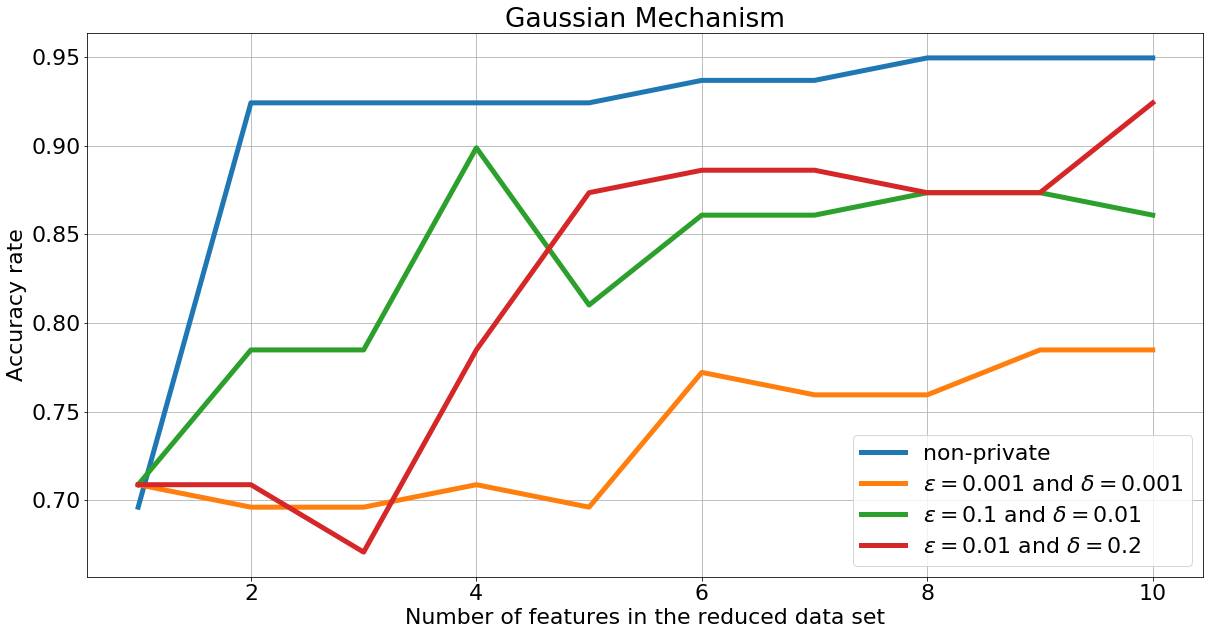

In [14]:
fig = plt.figure(figsize = (20, 10))
ax  = fig.add_subplot(1, 1, 1)
plt.grid()
plt.rcParams.update({'font.size': 22})
plt.xlabel("Number of features in the reduced data set")
plt.ylabel("Accuracy rate")
plt.title("Gaussian Mechanism")
plt.plot(range(1, 11), accuracy, label = 'non-private', linewidth = 5)
plt.plot(range(1, 11), accuracy_gaussian_mechanism[0], label = '$\epsilon = 0.001$ and $\delta = 0.001$', linewidth = 5)
plt.plot(range(1, 11), accuracy_gaussian_mechanism[7], label = '$\epsilon = 0.1$ and $\delta = 0.01$', linewidth = 5)
plt.plot(range(1, 11), accuracy_gaussian_mechanism[16], label = '$\epsilon = 0.01$ and $\delta = 0.2$', linewidth = 5)
plt.legend(loc = 'best')
plt.show()

fig.savefig('gaussian_mechanism_logistics.pdf')

## The Wishart Input Perturbation

In [10]:
epsilon = [0.001, 0.01, 0.1, 0.5, 1]

accuracy_wishart_mechanism = []
for _epsilon in epsilon:
    
    print("=" * 100)
    print("Running for epsilon {}".format(_epsilon))
    noisy_empirical_covariance_matrix = dp_algorithms.wishart_mechanism(x_train, _epsilon)
    
    eigen_values, eigen_vectors = np.linalg.eig(noisy_empirical_covariance_matrix)

    idx = eigen_values.argsort()[::-1]
    eigen_values  = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx] 
    
    print("Eigenvalues: {}".format(eigen_values))
    
    accuracy_temporary = []
    for i in range(1, 11):
        projected_train = np.matmul(x_train, eigen_vectors[:,:i])
        projected_test  = np.matmul(x_test, eigen_vectors[:, :i])

        regression = LogisticRegression(solver = 'liblinear').fit(projected_train, y_train)
        accuracy_temporary.append(accuracy_score(regression.predict(projected_test), y_test))

    print("Accuracy rate: {}".format(accuracy_temporary))
    accuracy_wishart_mechanism.append(accuracy_temporary)

Running for epsilon 0.001
Eigenvalues: [4.97852712e+02 4.57764744e+02 4.06885115e+02 3.71457372e+02
 3.53180470e+02 3.05226217e+02 2.91935780e+02 2.77639300e+02
 2.37637346e+02 2.21016058e+02 2.05164811e+02 1.71470508e+02
 1.59330161e+02 1.40967965e+02 1.31695636e+02 1.26481259e+02
 1.14300673e+02 9.39405883e+01 7.82755992e+01 5.83752263e+01
 4.90459294e+01 4.02029013e+01 3.41770400e+01 2.50428757e+01
 2.12927066e+01 1.78391688e+01 1.47043772e+01 7.80928765e+00
 6.15144854e+00 3.28843155e+00 2.06051047e+00 3.12403123e-01]
Accuracy rate: [0.7088607594936709, 0.6962025316455697, 0.7088607594936709, 0.7088607594936709, 0.7974683544303798, 0.810126582278481, 0.810126582278481, 0.8227848101265823, 0.7848101265822784, 0.8860759493670886]
Running for epsilon 0.01
Eigenvalues: [58.70341162 53.86023297 43.73659389 37.81024637 35.38552197 32.02461733
 29.49029768 28.61991192 24.70617805 21.57229856 18.32530176 17.45777162
 15.297215   14.29684048 12.95598123  9.63622217  8.36995873  8.05504129
 

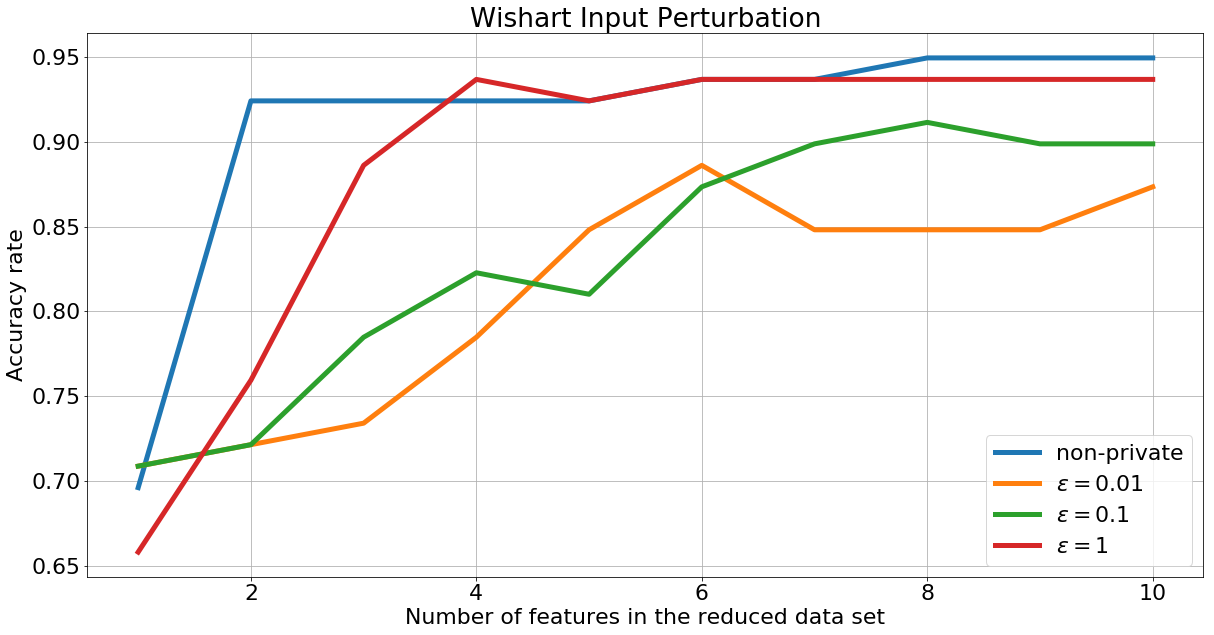

In [11]:
fig = plt.figure(figsize = (20, 10))
ax  = fig.add_subplot(1, 1, 1)
plt.grid()
plt.xlabel("Number of features in the reduced data set")
plt.ylabel("Accuracy rate")
plt.title("Wishart Input Perturbation")
plt.plot(range(1, 11), accuracy, label = 'non-private', linewidth = 5)
plt.plot(range(1, 11), accuracy_wishart_mechanism[1], label = '$\epsilon = 0.01$', linewidth = 5)
plt.plot(range(1, 11), accuracy_wishart_mechanism[2], label = '$\epsilon = 0.1$', linewidth = 5)
plt.plot(range(1, 11), accuracy_wishart_mechanism[4], label = '$\epsilon = 1$', linewidth = 5)
plt.legend(loc = 'best')
plt.show()

fig.savefig('wishart_mechanism_logistics.pdf')

## Laplace Input Perturbation

In [12]:
epsilon = [0.001, 0.01, 0.1, 0.5, 1]

accuracy_laplace_mechanism = []
for _epsilon in epsilon:
    
    print("=" * 100)
    print("Running for epsilon {}".format(_epsilon))
    noisy_empirical_covariance_matrix = dp_algorithms.wishart_mechanism(x_train, _epsilon)
    
    eigen_values, eigen_vectors = np.linalg.eig(noisy_empirical_covariance_matrix)

    idx = eigen_values.argsort()[::-1]
    eigen_values  = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx] 
    
    print("Eigenvalues: {}".format(eigen_values))
    
    accuracy_temporary = []
    for i in range(1, 11):
        projected_train = np.matmul(x_train, eigen_vectors[:,:i])
        projected_test  = np.matmul(x_test, eigen_vectors[:, :i])

        regression = LogisticRegression(solver = 'liblinear').fit(projected_train, y_train)
        accuracy_temporary.append(accuracy_score(regression.predict(projected_test), y_test))

    print("Accuracy rate: {}".format(accuracy_temporary))
    accuracy_laplace_mechanism.append(accuracy_temporary)

Running for epsilon 0.001
Eigenvalues: [5.83440376e+02 5.26660382e+02 4.99003134e+02 4.36169585e+02
 4.03447560e+02 3.43838545e+02 3.22553944e+02 3.09968875e+02
 2.64708179e+02 2.33539812e+02 2.03173520e+02 1.85929052e+02
 1.75215121e+02 1.30437044e+02 1.26938799e+02 1.02852120e+02
 9.58138114e+01 9.11947586e+01 6.46457896e+01 5.85446567e+01
 5.06042755e+01 4.03723826e+01 3.70920664e+01 2.77671630e+01
 2.51757291e+01 1.85654713e+01 1.20382451e+01 8.32749932e+00
 6.55749964e+00 3.34239872e+00 1.05215578e+00 1.48349315e-01]
Accuracy rate: [0.8734177215189873, 0.8607594936708861, 0.8354430379746836, 0.8481012658227848, 0.8481012658227848, 0.8481012658227848, 0.8734177215189873, 0.9113924050632911, 0.9367088607594937, 0.8987341772151899]
Running for epsilon 0.01
Eigenvalues: [6.55200499e+01 4.98490948e+01 4.81048256e+01 3.97115595e+01
 3.60833224e+01 3.08704024e+01 2.91826395e+01 2.47126460e+01
 2.29890360e+01 2.29028222e+01 1.83519219e+01 1.58263311e+01
 1.50090956e+01 1.43686801e+01 1.21

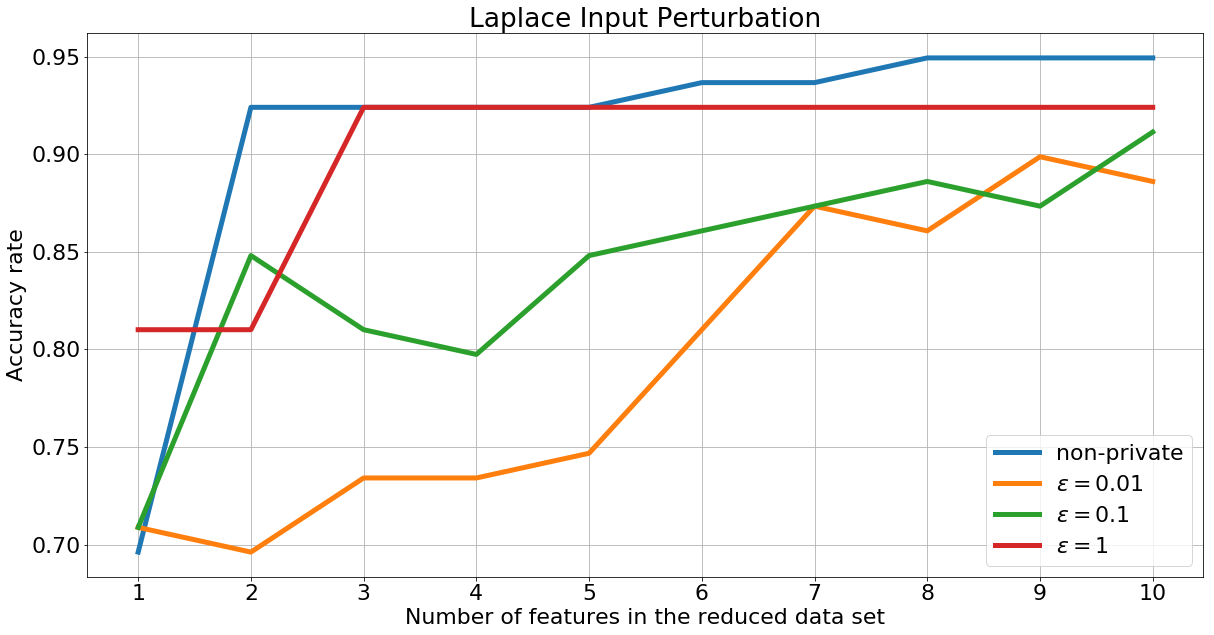

In [15]:
fig = plt.figure(figsize = (20, 10))
ax  = fig.add_subplot(1, 1, 1)
plt.grid()
plt.xlabel("Number of features in the reduced data set")
plt.ylabel("Accuracy rate")
plt.title("Laplace Input Perturbation")
plt.plot(range(1, 11), accuracy, label = 'non-private', linewidth = 5)
plt.plot(range(1, 11), accuracy_laplace_mechanism[1], label = '$\epsilon = 0.01$', linewidth = 5)
plt.plot(range(1, 11), accuracy_laplace_mechanism[2], label = '$\epsilon = 0.1$', linewidth = 5)
plt.plot(range(1, 11), accuracy_laplace_mechanism[4], label = '$\epsilon = 1$', linewidth = 5)
plt.legend(loc = 'best')
ax.set_xticks(range(1, 11))
plt.show()

fig.savefig('laplace_mechanism_logistic.pdf')